# Interfacial tension and density profiles: n-Butanol + MTBE + Water

Phase equilibria and interfacial behavior modeled by PRSV + MHV(NRTL) together with Square gradient theory.

Phase equilibria is solved by a combination of multiflash algorithm proposed by Gupta et al[1]. and minizamization of Gibbs free energy as proposed by Michelsen[2].

Euler - Lagrange boundary value problem of Square gradient Theory was solved using orthogonal collocation.

$$ \sum_j c_{ij} \frac{d^2 \rho_j}{dz^2} = \mu_i - \mu_i^0 \qquad i = 1,...,c \\
\rho(z \rightarrow -\infty) = \rho^\alpha \qquad \rho(z \rightarrow \infty) = \rho^\beta $$

### References

[1] A. K. Gupta, P. Raj Bishnoi, N. Kalogerakis, Fluid Phase Equilib., 63, 65–89(1991).

[2] Michelsen, M., Mollerup, J., Thermodynamic Models: Fundamental & Computational Aspects, 2nd. ed, 2008.

In [22]:
import numpy as np
from pandas import ExcelFile, read_excel
import matplotlib.pyplot as plt
import ternary
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, IntSlider
from toggle import hide_toggle
hide_toggle(part = 'Code')

<IPython.core.display.Javascript object>


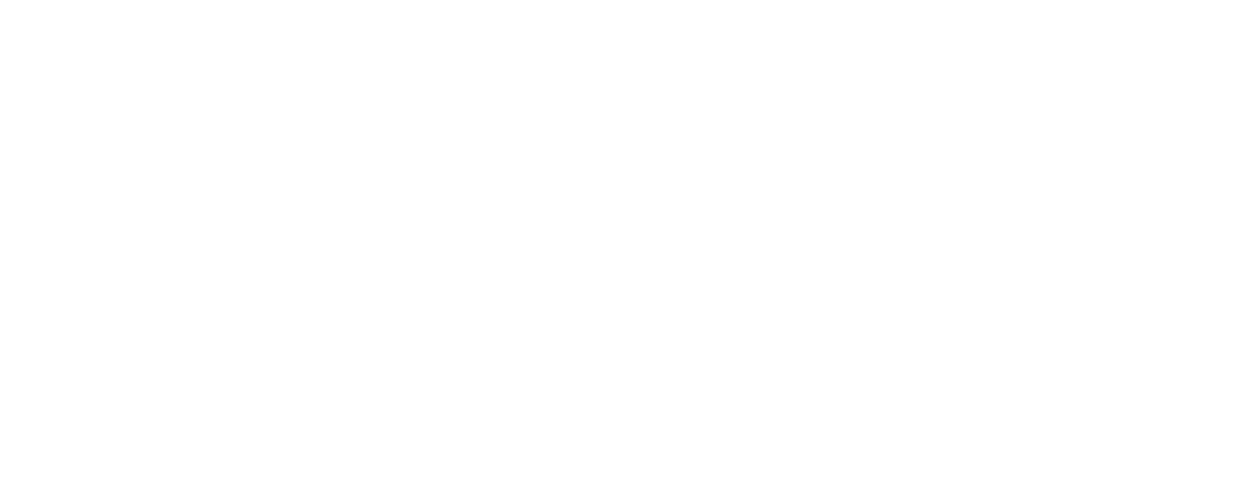

Text(0, 0.5, '$\\gamma$ / mN/m')

In [23]:
%matplotlib notebook
display(hide_toggle(part = 'Code'))

excel = ExcelFile('ethanolmtbewater.xlsx')

#Equilibrium data
dfdata = excel.parse('Tensiones')
T = np.asarray(dfdata.iloc[:, 0])
P = np.asarray(dfdata.iloc[:, 1])
ten_ov = np.asarray(dfdata.iloc[:, 5])
ten_av = np.asarray(dfdata.iloc[:, 6])
ten_oa = np.asarray(dfdata.iloc[:, 7])
W = np.asarray(dfdata.iloc[:, 8:11])
X = np.asarray(dfdata.iloc[:, 11:14])
Y = np.asarray(dfdata.iloc[:, 14:])


df = read_excel('expdata2.xlsx', 'ellv')
Tellv = np.asarray(df.iloc[:,1])
Pellv = np.asarray(df.iloc[:,0])
Xellv = np.asarray(df.iloc[:,2:5]).T
Wellv = np.asarray(df.iloc[:,5:8]).T
Yellv = np.asarray(df.iloc[:,8:11]).T

fig = plt.figure(figsize = (10,4))
fig.subplots_adjust(wspace = 0.4)
fontsize = 14

ax = fig.add_subplot(121, projection='3d')

#Equilibrio trifasico
ax.plot(X.T[0], X.T[1], T, 'b')
ax.plot(W.T[0], W.T[1], T, 'g')
ax.plot(Y.T[0], Y.T[1], T, 'C1')
ax.scatter(Xellv[0], Xellv[1], Tellv, color = 'c', marker = 's')
ax.scatter(Wellv[0], Wellv[1], Tellv, color = 'y', marker = 's')
ax.scatter(Yellv[0], Yellv[1], Tellv, color = 'red', marker = 's')

ax.plot([X[0,0], W[0,0], Y[0,0]], [X[0,1], W[0,1], Y[0,1]], [T[0], T[0], T[0]], 'o-',markersize = 4)


ax.set_xlabel(r"$x_{MTBE}, y_{MTBE}$")
ax.set_ylabel(r"$x_{ethanol}, y_{ethanol}$")
ax.set_zlabel("T/K", rotation = 90)
ax.view_init(elev=15, azim=-25)

T = T[1:]
X = X[1:,:]
W = W[1:,:]
Y = Y[1:,:]
ten_av = ten_av[1:]
ten_ov = ten_ov[1:]
ten_oa = ten_oa[1:]


axt = fig.add_subplot(122)
axt.plot(T, ten_av, label = 'L(Aq)/V')
axt.text(326.5, 21, 'L(Aq)/V', color = 'C0')
axt.plot(T, ten_ov, label = 'L(Org)/V')
axt.text(327, 15, 'L(Org)/V', color = 'C1')
axt.plot(T, ten_oa, label = 'L(Org)/L(Aq)')
axt.text(327, 4, 'L(Org)/L(Aq)', color = 'C2')
axt.plot(T, ten_oa + ten_ov, '-.')
axt.text(328, 20, 'L(Org)/L(Aq) + L(Org)/V', color = 'r')



axt.set_xlabel('T / K')
axt.set_ylabel(r'$\gamma$ / mN/m')

In [24]:
%matplotlib inline
fign = plt.figure(figsize = (16,5))
fign.subplots_adjust(wspace = 0.3, hspace = 0.1)

a1n = fign.add_subplot(131)
title1 = 'L(Aq) / V'
a1n.set_title(title1)
a1n.set_xlabel(r"$Z / \AA$")
a1n.set_ylabel(r"$\rho$" + " $mol/cm^3$")
a1n.set_ylim([0, 0.045])
a1n.set_xlim([0, 30])

a2n = fign.add_subplot(132)
title2 = 'L(Org) / V'
a2n.set_title(title2)
a2n.set_ylim([0, 0.045])
a2n.set_xlim([0, 12.5])
a2n.set_xlabel(r"$Z / \AA$")

a3n = fign.add_subplot(133)
title3 = 'L(Org) / L(Aq)'
a3n.set_title(title3)
a3n.set_xlabel(r"$Z / \AA$")
a3n.set_ylim([0, 0.045])
a3n.set_xlim([0, 12.5])
a2n.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
a1n.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
a3n.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

line11 = a1n.plot([], [], label = 'MTBE')
line12 = a1n.plot([], [], label = 'Ethanol')
line13 = a1n.plot([], [], label = 'Water')

line21 = a2n.plot([], [])
line22 = a2n.plot([], [])
line23 = a2n.plot([], [])

line31 = a3n.plot([], [])
line32 = a3n.plot([], [])
line33 = a3n.plot([], [])
plt.close(fign)

display(hide_toggle(part = 'Code'))
def function(i):
    dften = excel.parse(i)
    zwy = np.asarray(dften.iloc[:, 0])
    rwy = np.asarray(dften.iloc[:, 1:4]).T
    zxy = np.asarray(dften.iloc[:, 4])
    rxy = np.asarray(dften.iloc[:, 5:8]).T
    zxw = np.asarray(dften.iloc[:, 8])
    rxw = np.asarray(dften.iloc[:, 9:]).T
    line11[0].set_data(zwy, rwy[0])
    line12[0].set_data(zwy, rwy[1])
    line13[0].set_data(zwy, rwy[2])
    line21[0].set_data(zxy, rxy[0])
    line22[0].set_data(zxy, rxy[1])
    line23[0].set_data(zxy, rxy[2])
    line31[0].set_data(zxw, rxw[0])
    line32[0].set_data(zxw, rxw[1])
    line33[0].set_data(zxw, rxw[2])
    a1n.set_xlim(0, zwy[-1])
    a2n.set_xlim(0, zxy[-1])
    a3n.set_xlim(0, zxw[-1])

    fign.suptitle('Density profiles at ' + str(round(T[i], 2)) +'K')
    return fign

ti = IntSlider(value=1,    min=1,    max=49, step=1, description = 'T index', continuous_update=False)
interact(function, i = ti)

interactive(children=(IntSlider(value=1, continuous_update=False, description='T index', max=49, min=1), Outpu…

<function __main__.function(i)>